In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(168, 76, 3)


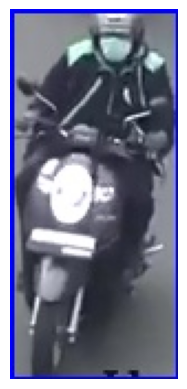

In [47]:
# Baca citra
image = cv2.imread('images/roi-motor/SCOOPY/119.jpg', cv2.COLOR_RGB2BGR)
# Konversi dari RGB ke BGR dengan memperhatikan profil warna
img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

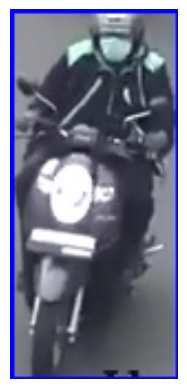

In [48]:
rszImg = cv2.resize(img, (int((img.shape[1] * 3)), int(img.shape[0] * 3))) 
cv2.imshow('rszImg', rszImg)

plt.imshow(rszImg)
plt.axis('off')
plt.show()

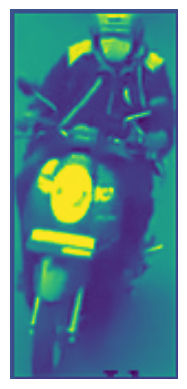

In [49]:
gray = cv2.cvtColor(rszImg, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.axis('off')
plt.show()

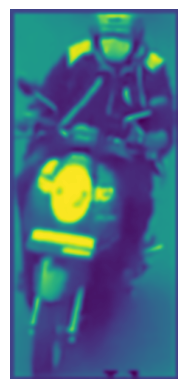

In [50]:
gausian = cv2.GaussianBlur(gray,(11,11),0)

plt.imshow(gausian)
plt.axis('off')
plt.show()

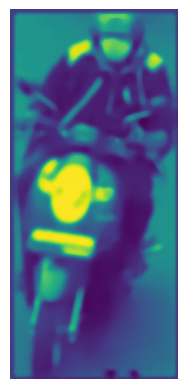

In [51]:
median = cv2.medianBlur(gausian, 9)
plt.imshow(median)
plt.axis('off')
plt.show()

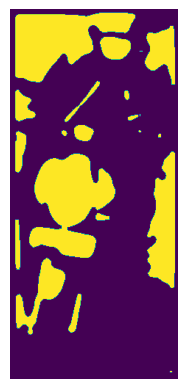

In [52]:
threshold_value = 127
ret, mask = cv2.threshold(median, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(mask)
plt.axis('off')
plt.show()

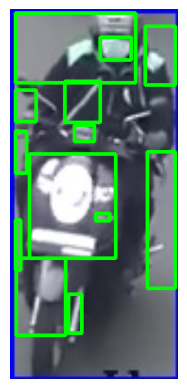

In [53]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
a = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    a+=1

    if area > 100:
        cv2.rectangle(rszImg,(x,y),(x+w , y+h),(0,255,0),3)
    # print(f"x:{x} y:{y} w:{w} h:{h}")
    # print(area)



plt.imshow(rszImg)
plt.axis('off')
plt.show()
